In [62]:
import pandas as pd
import numpy as np

# Major Feature Engineering Include:
1. Handle Missing Values (Find the relationship between missing values and target variables before handling them)
2. Encode Categorical Variables
3. Cardinality of Categorical Variables
4. Outliers
5. Handle Imbalance Dataset
6. Transformation (Standardization or Normalization)
7. Feature Selection Techniques


v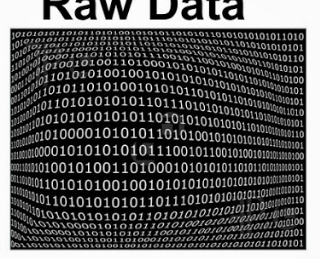

Important Points:
1. Bar Plot for discrete values
2. Histogram Plot for continous values
33. If numerical variables are skewed then perform log normal distribution

# Different types of missing data:
1. Missing Completely at Random (MCAR)
2. Missing Data Not At Random (MNAR)
3. Mising At Random (MAR)

# Techniques of handling missing values:
1. Mean/Median/Mode replacement : Data are missing completely at random (MCAR)
2. Random Sample Inputation
3. Capturing NAN values with new feature (It works well if the data are not missing completely at random and when there is lots of NaN values)
4. End of distribution imputation (Missing value is not at random then capturing that information is important)
5. Arbitrary  imputation
6. Frequent categories imputation
7. Treat nan value of categoriacal as new category
8. Apply classifier alog to predit NaN values (Most efficient technique) (KNN algo)
9. Apply unsupervised ML

In [63]:
#https://www.kaggle.com/c/titanic-dataset
dataset_path='titanic-dataset/titanic_train.csv'
df=pd.read_csv(dataset_path,usecols=['age','fare','survived'])
df2=df.copy()
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [64]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

## 1) Mean/Median/Mode replacement:
If a feature has lots of nan values replace with median or mode iff that feature has relationship target variable 

In [65]:
def impute_na(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    
impute_na(df,'age',df['age'].median())    

In [66]:
print(df['age'].std())
print(df['age_median'].std())

14.562243434125556
12.999022882894202


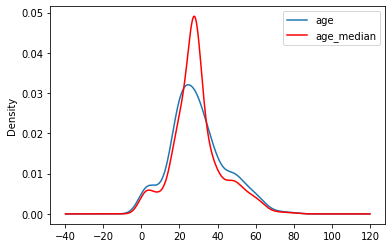

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure() 
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 1.1) Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

### 1.2) Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

For categorical variable,apply mode.


## 2) Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

It will all the NaN values with some randomly selected sample with random_state=0

In [68]:
df=df2.copy()
df['age'].isnull().sum() #total NaN values

df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [69]:
def impute_nan(df,variable,median):
    
    df[variable+"_median"]=df[variable].fillna(median)

    df[variable+"_random"]=df[variable]

    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index #place NaN index to random_sample
    
    #replace where NaN are there
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
impute_nan(df,"age",df['age'].median())    

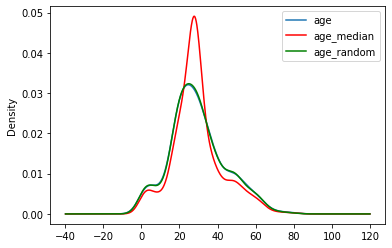

In [70]:
#plot

fig = plt.figure() 
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 2.1)  Advantages
- Easy To implement
- There is less distortion in variance

### 2.2)  Disadvantage
- Every situation randomness wont work

## 3) Capturing NAN values with new feature
It works well if the data are not missing completely at random and when there is more no. of NaN cols

It capture the importance of NaN value

In [71]:
df=df2.copy()
df['age_NAN']=np.where(df['age'].isnull(),1,0)
df.head()

,age,fare,survived,age_NAN
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


In [72]:
df['age'].fillna(df.age.median(),inplace=True) #also fill with Random Sample Imputation

### 3.1) Advantages
- Easy to implement
- Captures the importance of missing values

### 3.2) Disadvantages
- Creating Additional Features(Curse of Dimensionality)

## 4) End of distribution imputation
Missing value is not at random then capturing that information is important

We take the values that are after 3rd std

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

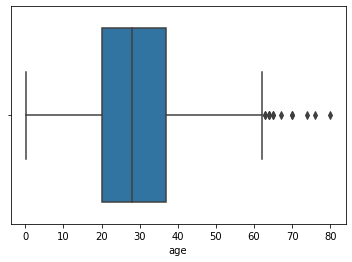

In [73]:
df=df2.copy()
import seaborn as sns
sns.boxplot('age',data=df)

In [74]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [75]:
extreme=df.age.mean()+3*df.age.std()
impute_nan(df,'age',df.age.median(),extreme)

df.head()

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_end_distribution'>

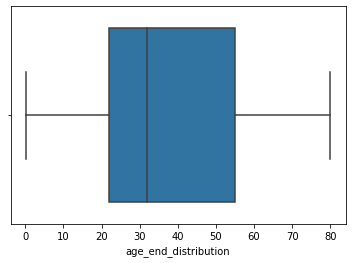

In [76]:
sns.boxplot('age_end_distribution',data=df)

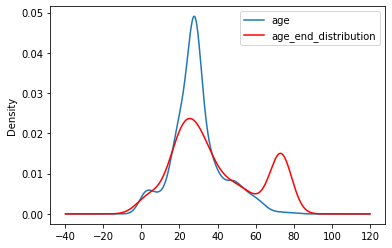

In [77]:
#plot

fig = plt.figure() 
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df['age_end_distribution'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 5)Arbitrary Value Imputation
This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [78]:
df=df2.copy()
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

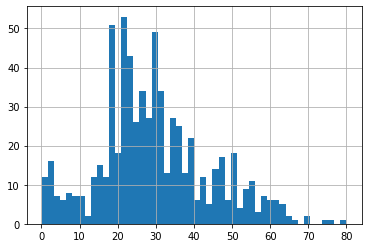

In [79]:
df['age'].hist(bins=50)

<AxesSubplot:>

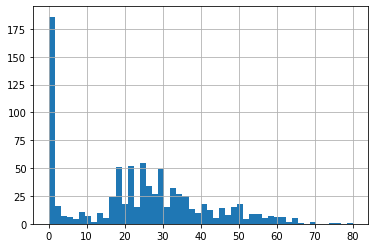

In [80]:
impute_nan(df,'age')
df['age_zero'].hist(bins=50)

<AxesSubplot:>

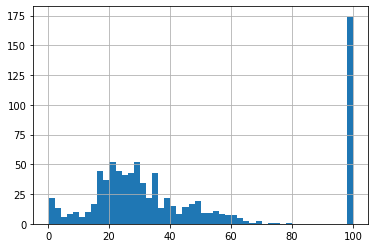

In [81]:
df['age_hundred'].hist(bins=50)

### 5.1)Advantages
- Easy to implement
- Captures the importance of missingess if there is one

### 5.2)Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

## 6)Frequent Category Imputation

In [82]:
df=pd.read_csv(dataset_path)
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [83]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

<AxesSubplot:>

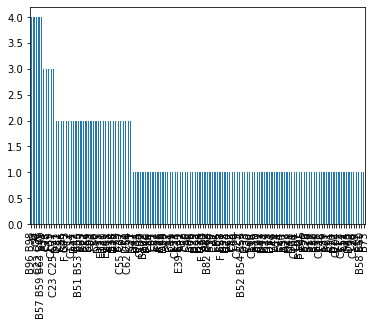

In [84]:
df['cabin'].value_counts().plot.bar()

<AxesSubplot:xlabel='cabin'>

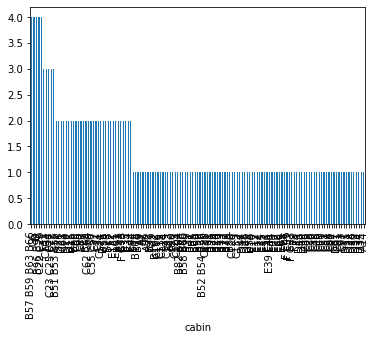

In [85]:
df.groupby(['cabin'])['cabin'].count().sort_values(ascending=False).plot.bar()

In [86]:
print(df.cabin.mode()[0])
print(df.groupby(['cabin'])['cabin'].count().sort_values(ascending=False).index[0])

B57 B59 B63 B66
B57 B59 B63 B66


In [87]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0] #return index of most frequent variable
    df[variable].fillna(most_frequent_category,inplace=True)

In [88]:
impute_nan(df,'cabin')

In [89]:
df['cabin']

0      B57 B59 B63 B66
1      B57 B59 B63 B66
2      B57 B59 B63 B66
3      B57 B59 B63 B66
4      B57 B59 B63 B66
            ...       
845                C39
846                B37
847    B57 B59 B63 B66
848    B57 B59 B63 B66
849    B57 B59 B63 B66
Name: cabin, Length: 850, dtype: object

In [54]:
df['cabin'].isnull().sum()

0

### 6.1)Advantages
- Easy To implement
- Fater way to implement

### 6.2)Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

## 7)Treat nan value of categoriacal as new category

In [57]:
df=pd.read_csv(dataset_path)
df['cabin'].isnull().sum()

659

In [58]:
df['cabin_nan']=df['cabin'].fillna('Missing')

In [59]:
df['cabin_nan'].unique()

array(['Missing', 'C82', 'D15', 'C50', 'E33', 'B57 B59 B63 B66', 'E34',
       'C83', 'C125', 'B82 B84', 'B96 B98', 'B51 B53 B55', 'C132', 'C31',
       'C68', 'B94', 'F E46', 'C126', 'D34', 'B28', 'C65', 'B52 B54 B56',
       'D17', 'C86', 'C7', 'E25', 'E17', 'D56', 'A9', 'B26', 'C91', 'B5',
       'D', 'A23', 'C22 C26', 'C124', 'E63', 'B35', 'B18', 'C6', 'B49',
       'B19', 'G6', 'D35', 'C23 C25 C27', 'C62 C64', 'B73', 'E12', 'B41',
       'A20', 'B69', 'C78', 'A14', 'D26', 'C51', 'B79', 'E52', 'C49',
       'C104', 'B61', 'D43', 'D48', 'C123', 'A7', 'D47', 'D49', 'B80',
       'A29', 'F38', 'B58 B60', 'A34', 'D33', 'D20', 'F G63', 'T', 'A6',
       'C55 C57', 'B38', 'E49', 'F4', 'E121', 'C85', 'C87', 'B86', 'B102',
       'C111', 'D22', 'B22', 'B77', 'B50', 'B30', 'E36', 'F33', 'E60',
       'B39', 'C118', 'D21', 'F2', 'E39 E41', 'E101', 'A32', 'D38',
       'C101', 'C54', 'C106', 'C32', 'D36', 'E50', 'D40', 'C30', 'C52',
       'C130', 'C80', 'F G73', 'E10', 'B10', 'B24', 'C2', 'D

In [60]:
df['cabin_nan'].value_counts()

Missing            659
C22 C26              4
G6                   4
D                    4
B57 B59 B63 B66      4
                  ... 
C126                 1
A9                   1
E31                  1
B58 B60              1
B73                  1
Name: cabin_nan, Length: 136, dtype: int64